In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('CSUN_USVI_temperature_Daily_20210401.csv')
data.describe()

,Temperature
count,11290.000000
mean,27.792755
std,1.229089
min,24.900000
25%,26.800000
50%,28.000000
75%,28.800000
max,30.600000


In [3]:
data

,Owner,Site,Temperature,Date
0,NPS Data,Yawzi - NPS,25.8,1989-01-10
1,NPS Data,Yawzi - NPS,25.7,1989-01-11
2,NPS Data,Yawzi - NPS,25.6,1989-01-12
3,NPS Data,Yawzi - NPS,25.5,1989-01-13
4,NPS Data,Yawzi - NPS,25.5,1989-01-14
...,...,...,...,...
11290,PJE Data,Yawzi 9 m,29.4,2020-07-28
11291,PJE Data,Yawzi 9 m,29.2,2020-07-29
11292,PJE Data,Yawzi 9 m,29.1,2020-07-30
11293,PJE Data,Yawzi 9 m,29.3,2020-07-31


In [4]:
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index)

In [5]:
monthly = data.resample('1M').mean()
monthly

,Temperature
Date,
1989-01-31,25.504545
1989-02-28,25.214286
1989-03-31,25.625806
1989-04-30,25.884615
1989-05-31,27.090909
...,...
2020-04-30,27.843333
2020-05-31,28.567742
2020-06-30,29.313333


In [6]:
data.resample('1Y').mean()

,Temperature
Date,
1989-12-31,27.161695
1990-12-31,27.425753
1991-12-31,27.331933
1992-12-31,27.489344
1993-12-31,27.570411
1994-12-31,27.402192
1995-12-31,27.815449
1996-12-31,27.344809
1997-12-31,27.810033


In [7]:
data.columns
daily_temp = data[['Temperature']]
daily_temp.dropna(axis=0)

,Temperature
Date,
1989-01-10,25.8
1989-01-11,25.7
1989-01-12,25.6
1989-01-13,25.5
1989-01-14,25.5
...,...
2020-07-28,29.4
2020-07-29,29.2
2020-07-30,29.1


<AxesSubplot:xlabel='Date'>

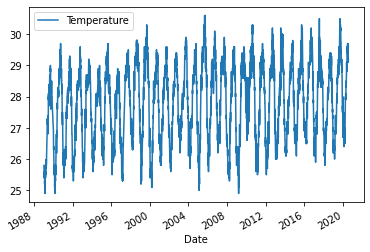

In [8]:
daily_temp.plot()

In [9]:
monthly = monthly[252:]
monthly.head()

,Temperature
Date,
2010-01-31,27.509677
2010-02-28,27.428571
2010-03-31,27.716129
2010-04-30,27.816667
2010-05-31,28.593548


<AxesSubplot:xlabel='Date'>

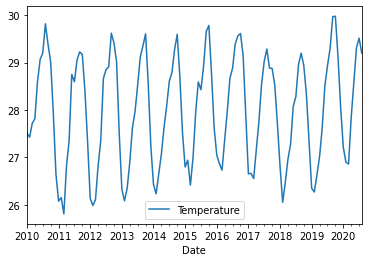

In [10]:
monthly.plot()

In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ExpSineSquared as ESS

In [12]:
monthly.describe()

,Temperature
count,128.000000
mean,27.993493
std,1.140156
min,25.809677
25%,26.955714
50%,28.014516
75%,28.968548
max,29.977419


In [13]:
X = np.arange(len(monthly)).reshape(-1,1)
y = monthly.Temperature

In [14]:
kernel = ESS(length_scale=.05, periodicity=1e3)

In [15]:
gpr = GPR(kernel=kernel)
gpr.fit(X, y)

GaussianProcessRegressor(kernel=ExpSineSquared(length_scale=0.05, periodicity=1e+03))

In [16]:
x = np.atleast_2d(np.linspace(0, len(monthly), 2000)).T

In [17]:
y_pred, sigma = gpr.predict(x, return_std=True)

In [18]:
print(sigma)

[9.96717832e-06 9.07426273e-06 8.73038929e-06 ... 9.57177501e-05
 1.08786260e-04 1.23106825e-04]


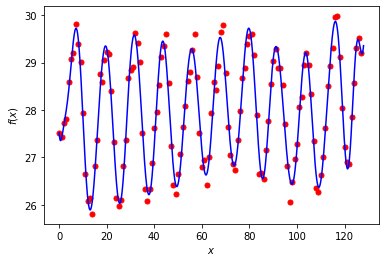

In [19]:
plt.figure()
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.96 * sigma, 
                        (y_pred + 1.96 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% cofidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.show()